Now that we have our data, the next step is to clean up the datafiles and create visulizations. We'll start by importing the proper packages and opening the data files for each college prerequisite list as well as each of the four subject clusters in the College of Letters and Science.

In [67]:
# Importing packages for word visualizations
import csv
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Opening the datafiles for each of the college prerequisites
engCsv = open('engreqs.csv','r')
lsCsv = open('lsreqs.csv','r')
agCsv = open('agreqs.csv','r')
bioCsv = open('bioreqs.csv','r')
faCsv = open('fareqs.csv','r')
ssCsv = open('ssreqs.csv','r')
mpCsv = open('mpreqs.csv','r')
hmCsv = open ('hmreqs.csv','r')

# Reading the contents of the csv files into memory
engTable = csv.reader(engCsv)
lsTable  = csv.reader(lsCsv)
agTable = csv.reader(agCsv)
bioTable = csv.reader(bioCsv)
faTable = csv.reader(faCsv)
ssTable = csv.reader(ssCsv)
mpTable = csv.reader(mpCsv)
hmTable = csv.reader(hmCsv)


# Removing mistakes from imperfect datasets
removeList = ['Select','knowledge','recommend','require','course']

"""
This function goes through each course in a given table of majors and produces a list of all of the courses of interest in that file.

Inputs:
    majorTable: The csv containing a list of all of the lower-division prerequisite courses for that college or subject area
    
Outputs:
    courseList: A list of all of the courses contained within that file
"""

def getCourseList(majorTable):
    courseList = []
    for row in majorTable:
        for course in row:
            if any(keyword in course for keyword in removeList):
                continue
            else:
                courseList.append(course)                
    return courseList

# Extracting course lists from each college
engCourseList = getCourseList(engTable)
lsCourseList = getCourseList(lsTable)
bioCourseList = getCourseList(bioTable)
agCourseList = getCourseList(agTable)

# Extracting course lises from each major grouping for the college of Letters and Science
faCourseList = getCourseList(faTable)
ssCourseList = getCourseList(ssTable)
mpCourseList = getCourseList(mpTable)
hmCourseList = getCourseList(hmTable)

"""
This function takes a list of courses and creates a string from it.

Inputs:
    courseList: A list of courses. This is the output of the function getCourseList defined above.
    
Outputs:
    combinedText: A string of all of the courses oritinally read in as a list.

"""

def combineText(courseList):
    combinedText = ''
    for course in courseList:
        tokens = course.split()
        for string in tokens:
            if not any(keyword in string for keyword in removeList) and string[0].isdigit() == False:
                combinedText += string
                
        combinedText += ' '
    return combinedText  

engCombinedText = combineText(engCourseList)
lsCombinedText = combineText(lsCourseList)          
agCombinedText = combineText(agCourseList)
bioCombinedText = combineText(bioCourseList)
faCombinedText = combineText(faCourseList)
ssCombinedText = combineText(ssCourseList)
mpCombinedText = combineText(mpCourseList)
hmCombinedText = combineText(hmCourseList)

# Creating a new dataframe of all of the college prerequisites
combinedText = engCombinedText + lsCombinedText + agCombinedText + bioCombinedText

# This closes the csv files now that we are done.
engCsv.close()
lsCsv.close()
agCsv.close()
bioCsv.close()
faCsv.close()
ssCsv.close()
mpCsv.close()
hmCsv.close()

The first step is to create a word cloud for each list of courses. This is to see the most common subject areas for each college and each undeclared major area within the College of Letters and Science.

Engineering Word Cloud


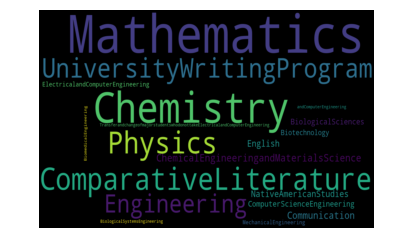

L&S Word Cloud


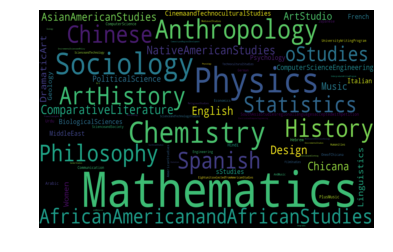

Fine Arts Word Cloud


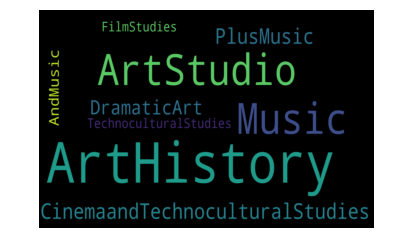

Social Science Word Cloud


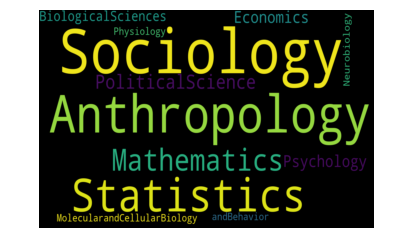

Math and Physical Science Word Cloud


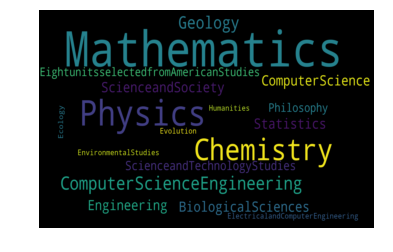

Humanities Word Cloud


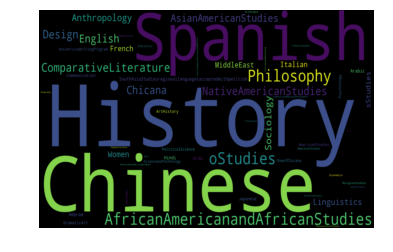

Agriculture Word Cloud


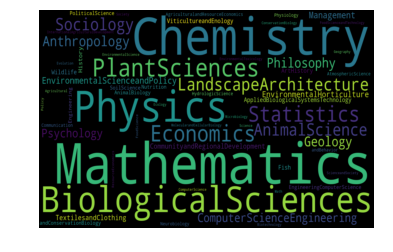

Biology Word Cloud


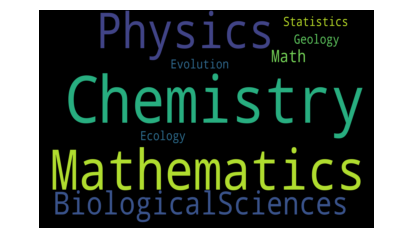

Combined Word Cloud


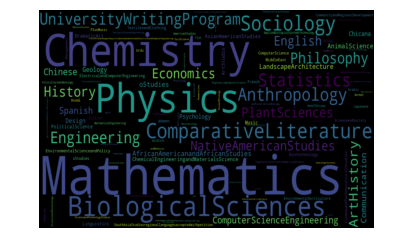

In [68]:
# Generating a wordcloud for each dataframe
combinedWordCloud = WordCloud(width=1800,height=1000,collocations = False).generate(combinedText)
engWordCloud = WordCloud(width=1800,height=1000,collocations = False).generate(engCombinedText)
lsWordCloud = WordCloud(width=1800,height=1000,collocations = False).generate(lsCombinedText)
agWordCloud = WordCloud(width=1800,height=1000,collocations = False).generate(agCombinedText)
bioWordCloud = WordCloud(width=1800,height=1000,collocations = False).generate(bioCombinedText)
faWordCloud = WordCloud(width=1800,height=1000,collocations = False).generate(faCombinedText)
ssWordCloud = WordCloud(width=1800,height=1000,collocations = False).generate(ssCombinedText)
mpWordCloud = WordCloud(width=1800,height=1000,collocations = False).generate(mpCombinedText)
hmWordCloud = WordCloud(width=1800,height=1000,collocations = False).generate(hmCombinedText)


# Printing the wordclouds
plt.clf()
print("Engineering Word Cloud")
plt.imshow(engWordCloud, interpolation='bilinear',aspect='auto')
plt.axis("off")
plt.show()

plt.clf()
print("L&S Word Cloud")
plt.imshow(lsWordCloud, interpolation='bilinear',aspect='auto')
plt.axis("off")
plt.show()

plt.clf()
print("Fine Arts Word Cloud")
plt.imshow(faWordCloud, interpolation='bilinear',aspect='auto')
plt.axis("off")
plt.show()

plt.clf()
print("Social Science Word Cloud")
plt.imshow(ssWordCloud, interpolation='bilinear',aspect='auto')
plt.axis("off")
plt.show()

plt.clf()
print("Math and Physical Science Word Cloud")
plt.imshow(mpWordCloud, interpolation='bilinear',aspect='auto')
plt.axis("off")
plt.show()

plt.clf()
print("Humanities Word Cloud")
plt.imshow(huWordCloud, interpolation='bilinear',aspect='auto')
plt.axis("off")
plt.show()


plt.clf()
print("Agriculture Word Cloud")
plt.imshow(agWordCloud, interpolation='bilinear',aspect='auto')
plt.axis("off")
plt.show()

plt.clf()
print("Biology Word Cloud")
plt.imshow(bioWordCloud, interpolation='bilinear',aspect='auto')
plt.axis("off")
plt.show()

plt.clf()
print("Combined Word Cloud")
plt.imshow(combinedWordCloud, interpolation='bilinear',aspect='auto')
plt.axis("off")
plt.show()



The next step is to create bar plots that include both the subject area (i.e. Mathematics) and the associated course number (i.e. 21A). This is because we want to look at the frequency of each individual course.

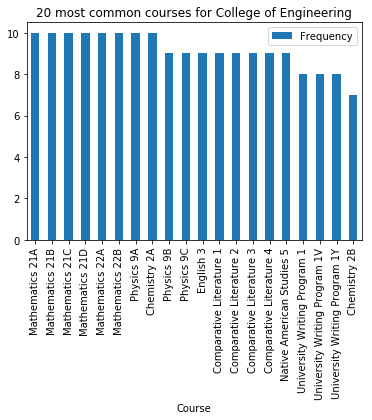

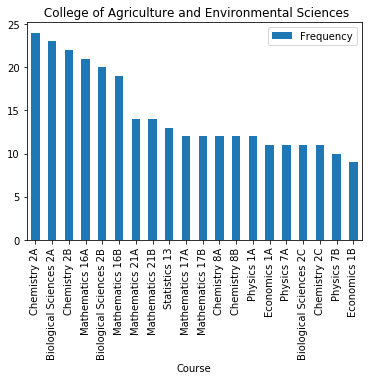

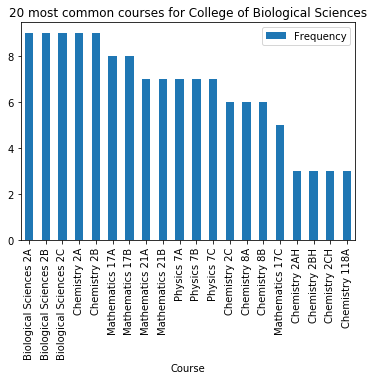

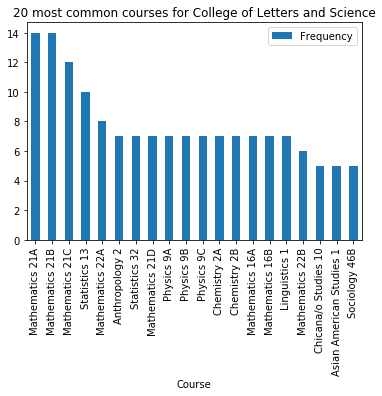

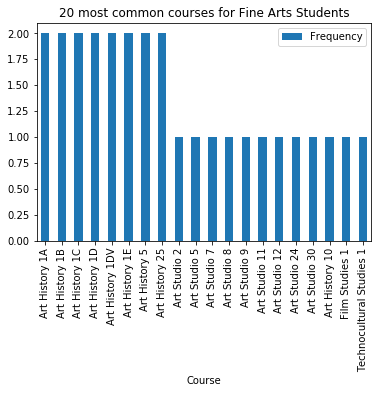

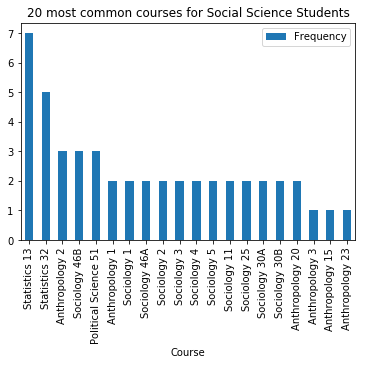

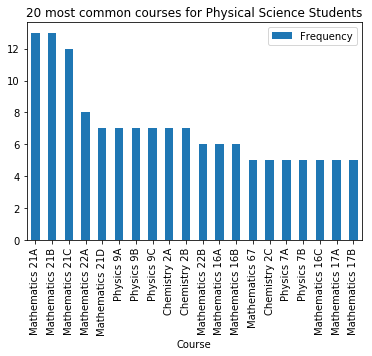

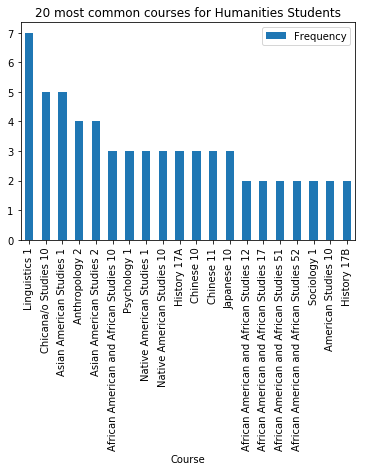

In [69]:
# Plotting bar plots

plt.clf()
import pandas
from collections import Counter

def createCourseBarPlot(courseList,plotTitle):
    courseCounts = Counter(courseList)
    df = pandas.DataFrame(courseCounts.most_common()[:20])
    df.columns = ['Course','Frequency']
    df = df.set_index('Course')
    df.plot(kind = 'bar', title = plotTitle)
    plt.show()

# Creating bar plots for the four colleges
createCourseBarPlot(engCourseList,'20 most common courses for College of Engineering')
createCourseBarPlot(agCourseList,' College of Agriculture and Environmental Sciences')
createCourseBarPlot(bioCourseList,'20 most common courses for College of Biological Sciences')
createCourseBarPlot(lsCourseList,'20 most common courses for College of Letters and Science')

# Creating bar plots for the major cluters in the college of Letters and Science
createCourseBarPlot(faCourseList,'20 most common courses for Fine Arts Students')
createCourseBarPlot(ssCourseList,'20 most common courses for Social Science Students')
createCourseBarPlot(mpCourseList,'20 most common courses for Physical Science Students')
createCourseBarPlot(hmCourseList,'20 most common courses for Humanities Students')


        